We imported required libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Checked tensorflow version

In [2]:
import tensorflow
tensorflow. __version__

'2.3.0'

Readed Tesla-train.csv file and defined as dataset_train. Then open values in the dataset_train are defined in the training_set. Finally, first 5 rows of the dataset_train are displayed.

In [3]:
dataset_train = pd.read_csv('Tesla-train.csv')
training_set = dataset_train.iloc[:, 1:2].values
dataset_train.head(5)

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


Informations about the dataset_train is displayed with the info function.

In [4]:
dataset_train.info()
dataset_train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1331 entries, 0 to 1330
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1331 non-null   object 
 1   Open       1331 non-null   float64
 2   High       1331 non-null   float64
 3   Low        1331 non-null   float64
 4   Close      1331 non-null   float64
 5   Volume     1331 non-null   int64  
 6   Adj Close  1331 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 72.9+ KB


(1331, 7)

The necessary libraries for plotting plots were imported. Afterwards, the necessary information for drawing the plots was entered. According to the dataset_train, the values of the columns and their graphs were drawn depending on time, respectively.
Tesla Open Price was first plotted. Then Tesla High Price and Tesla Low Price. Finally, they were all shown on a plot.

In [5]:
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
import plotly.graph_objects as go
trace=go.Scatter(x=dataset_train.index, y=dataset_train.iloc[:,1],
                    mode='lines',
                    name='Open',
                    marker = dict(color = 'red'))
layout = dict(title = 'Tesla Open Price 2010-2017',
              xaxis= dict(title= 'Time'),
              yaxis=dict(title='Open Price')
             )
fig = dict(data = trace, layout = layout)

iplot(fig)

In [6]:
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
import plotly.graph_objects as go
trace=go.Scatter(x=dataset_train.index, y=dataset_train.iloc[:,2],
                    mode='lines',
                    name='High',
                    marker = dict(color = 'red'))
layout = dict(title = 'Tesla High Price 2010-2017',
              xaxis= dict(title= 'Time'),
              yaxis=dict(title='High Price')
             )
fig = dict(data = trace, layout = layout)

iplot(fig)

In [7]:
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
import plotly.graph_objects as go
trace=go.Scatter(x=dataset_train.index, y=dataset_train.iloc[:,3],
                    mode='lines',
                    name='Low',
                    marker = dict(color = 'red'))
layout = dict(title = 'Tesla Low Price 2010-2017',
              xaxis= dict(title= 'Time'),
              yaxis=dict(title='Low Price')
             )
fig = dict(data = trace, layout = layout)

iplot(fig)

In [8]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dataset_train.index, y=dataset_train.iloc[:,1],
                    mode='lines',
                    name='Open'))
fig.add_trace(go.Scatter(x=dataset_train.index, y=dataset_train.iloc[:,2],
                    mode='lines',
                    name='High'))
fig.add_trace(go.Scatter(x=dataset_train.index, y=dataset_train.iloc[:,3],
                    mode='lines',
                    name='Low'))
fig.update_layout(title='Tesla Open Price-High Price-Low Price-Close Price',
                  xaxis_title='Time',
                  yaxis_title='Price')

iplot(fig)

Feature scaling normalization. 
We defined the scaling range as 0 to 1. Then we fit the open price data. Fit_transform is to calculate and then transform. It is the calculation of columns from the data and then replacing the missing values.

In [12]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
print (training_set_scaled)
print (training_set_scaled.shape)

[[0.01053291]
 [0.03553936]
 [0.03262991]
 ...
 [0.93415091]
 [0.93764953]
 [0.96818026]]
(1331, 1)


Creating a data structure with 60 timesteps. Timestep means how many stock prices the network will look at at time t. 
Since we set the timestep as 60, it will look at 60 stock prices at every t moment. It will try to predict the next one based on the trends it catches over 60 time steps.

In [13]:
x_train = []
y_train = []
for i in range(60,1331):
    x_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print (x_train.shape)

(1271, 60, 1)


We created a SimpleRNN network.
Configures the model for training. Optimizer is the mechanism that the network will update itself according to the data it sees and the loss function. Loss function is how the network can measure how well it does a job in training data and thus steer itself in the right direction. Metrics to monitor during train and testing.

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

regressor = Sequential()

regressor.add(SimpleRNN(units= 50, return_sequences = False, input_shape=(x_train.shape[1], 1)))

regressor.add(Dense(units = 1))

regressor.compile(optimizer='adam', loss='mean_squared_error') 

Then model fitted. Epoch number defined 64. Defined batch size as 32. And defined validation_split as 0.3.

In [23]:
history= regressor.fit(x_train, y_train, epochs=64, batch_size=32, validation_split=0.3)

Epoch 1/64
28/28 [==============================] - 0s 14ms/step - loss: 0.0719 - val_loss: 0.0024
Epoch 2/64
28/28 [==============================] - 0s 8ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 3/64
28/28 [==============================] - 0s 8ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 4/64
28/28 [==============================] - 0s 9ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 5/64
28/28 [==============================] - 0s 8ms/step - loss: 9.8612e-04 - val_loss: 0.0014
Epoch 6/64
28/28 [==============================] - 0s 8ms/step - loss: 9.4504e-04 - val_loss: 0.0011
Epoch 7/64
28/28 [==============================] - 0s 9ms/step - loss: 9.1434e-04 - val_loss: 0.0010
Epoch 8/64
28/28 [==============================] - 0s 8ms/step - loss: 8.6564e-04 - val_loss: 0.0010
Epoch 9/64
28/28 [==============================] - 0s 8ms/step - loss: 8.3749e-04 - val_loss: 9.8042e-04
Epoch 10/64
28/28 [==============================] - 0s 8ms/step - loss: 8.4352e-04 - val_los

Readed Tesla-test.csv file and defined as dataset_test. Then open values in the dataset_test are defined in the real_stock_price. Finally, first 5 rows of the dataset_test are displayed.

In [24]:
dataset_test = pd.read_csv('Tesla-test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
dataset_test.head(5)

,Date,Open,High,Low,Close,Volume,Adj Close
0,7/19/2010,21.370001,22.250000,20.920000,21.910000,2486500,21.910000
1,7/20/2010,21.850000,21.850000,20.049999,20.299999,1825300,20.299999
2,7/21/2010,20.660000,20.900000,19.500000,20.219999,1252500,20.219999
3,7/22/2010,20.500000,21.250000,20.370001,21.000000,957800,21.000000
4,7/23/2010,21.190001,21.559999,21.059999,21.290001,653600,21.290001


We get real open values in test data. We provide estimation of open values in test and train data according to real values.

In [25]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis =0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60, 420):
    x_test.append(inputs[i-60:i, 0])
x_test= np.array(x_test)
x_test= np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Then, the plot was drawn based on the above values.

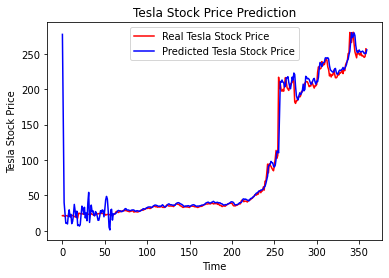

In [26]:
plt.plot(real_stock_price,color='red', label='Real Tesla Stock Price')
plt.plot(predicted_stock_price,color='blue', label='Predicted Tesla Stock Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()

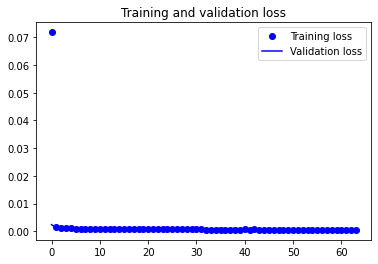

In [27]:
from matplotlib import pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

We drew a plot to examine the loss and val_loss values. 
When we look at the model, the training loss and validation loss curves are adjoining towards 0. No overfitting or underfitting.

We created a basic LSTM network. Configures the model for training. Optimizer is the mechanism that the network will update itself according to the data it sees and the loss function. Loss function is how the network can measure how well it does a job in training data and thus steer itself in the right direction. Metrics to monitor during train and testing.

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

regressor = Sequential()

regressor.add(LSTM(units= 50, return_sequences = True, input_shape=(x_train.shape[1], 1)))

regressor.add(Dense(units = 1))

regressor.compile(optimizer='adam', loss='mean_squared_error',metrics='accuracy') 

In [29]:
history= regressor.fit(x_train, y_train, epochs=64, batch_size=32, validation_split=0.3)

Epoch 1/64
28/28 [==============================] - 1s 33ms/step - loss: 0.0676 - accuracy: 9.5613e-04 - val_loss: 0.0356 - val_accuracy: 0.0000e+00
Epoch 2/64
28/28 [==============================] - 1s 20ms/step - loss: 0.0223 - accuracy: 9.9363e-04 - val_loss: 0.0298 - val_accuracy: 0.0000e+00
Epoch 3/64
28/28 [==============================] - 1s 19ms/step - loss: 0.0187 - accuracy: 0.0010 - val_loss: 0.0268 - val_accuracy: 0.0000e+00
Epoch 4/64
28/28 [==============================] - 1s 19ms/step - loss: 0.0170 - accuracy: 0.0010 - val_loss: 0.0242 - val_accuracy: 0.0000e+00
Epoch 5/64
28/28 [==============================] - 1s 19ms/step - loss: 0.0159 - accuracy: 0.0010 - val_loss: 0.0226 - val_accuracy: 0.0000e+00
Epoch 6/64
28/28 [==============================] - 1s 19ms/step - loss: 0.0151 - accuracy: 0.0010 - val_loss: 0.0217 - val_accuracy: 0.0000e+00
Epoch 7/64
28/28 [==============================] - 1s 19ms/step - loss: 0.0144 - accuracy: 0.0011 - val_loss: 0.0207 - va

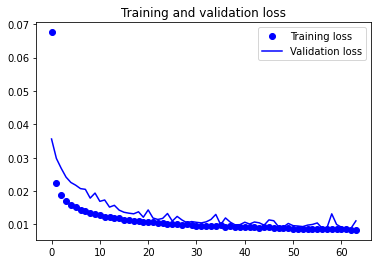

In [30]:
from matplotlib import pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Again, we drew a plot to examine the loss and val_loss values. 
When we look at the plot of the model, fluctuations are observed in the validation loss curve. The training loss curve approaches 0 linearly.

We created the network to see the effect of dropout and recurrent dropout in the LSTM network. Configures the model for training. Optimizer is the mechanism that the network will update itself according to the data it sees and the loss function. Loss function is how the network can measure how well it does a job in training data and thus steer itself in the right direction. Metrics to monitor during train and testing.

In [41]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

regressor = Sequential()

regressor.add(LSTM(units= 50,dropout=0.1,recurrent_dropout=0.5, return_sequences = True, input_shape=(x_train.shape[1], 1)))

regressor.add(LSTM(units = 50,dropout=0.1,recurrent_dropout=0.5,return_sequences=True)) 

regressor.add(LSTM(units = 50,dropout=0.1,recurrent_dropout=0.5,return_sequences=True)) 

regressor.add(LSTM(units = 50,dropout=0.1,recurrent_dropout=0.5,return_sequences=True)) 

regressor.add(Dense(units = 1))

regressor.compile(optimizer='adam', loss='mean_squared_error',metrics='accuracy') 

In [42]:
history= regressor.fit(x_train, y_train, epochs=64, batch_size=32, validation_split=0.3)

Epoch 1/64
28/28 [==============================] - 6s 220ms/step - loss: 0.0771 - accuracy: 8.6239e-04 - val_loss: 0.0662 - val_accuracy: 0.0000e+00
Epoch 2/64
28/28 [==============================] - 5s 177ms/step - loss: 0.0336 - accuracy: 9.7488e-04 - val_loss: 0.0459 - val_accuracy: 0.0000e+00
Epoch 3/64
28/28 [==============================] - 5s 173ms/step - loss: 0.0281 - accuracy: 9.9363e-04 - val_loss: 0.0374 - val_accuracy: 0.0000e+00
Epoch 4/64
28/28 [==============================] - 5s 175ms/step - loss: 0.0244 - accuracy: 0.0010 - val_loss: 0.0337 - val_accuracy: 0.0000e+00
Epoch 5/64
28/28 [==============================] - 5s 175ms/step - loss: 0.0233 - accuracy: 0.0010 - val_loss: 0.0294 - val_accuracy: 0.0000e+00
Epoch 6/64
28/28 [==============================] - 5s 173ms/step - loss: 0.0219 - accuracy: 0.0010 - val_loss: 0.0271 - val_accuracy: 0.0000e+00
Epoch 7/64
28/28 [==============================] - 5s 174ms/step - loss: 0.0206 - accuracy: 0.0010 - val_loss: 

Epoch 57/64
28/28 [==============================] - 5s 174ms/step - loss: 0.0101 - accuracy: 0.0011 - val_loss: 0.0087 - val_accuracy: 0.0000e+00
Epoch 58/64
28/28 [==============================] - 5s 175ms/step - loss: 0.0098 - accuracy: 0.0011 - val_loss: 0.0091 - val_accuracy: 0.0000e+00
Epoch 59/64
28/28 [==============================] - 5s 174ms/step - loss: 0.0100 - accuracy: 0.0011 - val_loss: 0.0096 - val_accuracy: 0.0000e+00
Epoch 60/64
28/28 [==============================] - 5s 176ms/step - loss: 0.0104 - accuracy: 0.0011 - val_loss: 0.0120 - val_accuracy: 0.0000e+00
Epoch 61/64
28/28 [==============================] - 5s 179ms/step - loss: 0.0100 - accuracy: 0.0011 - val_loss: 0.0086 - val_accuracy: 0.0000e+00
Epoch 62/64
28/28 [==============================] - 5s 176ms/step - loss: 0.0097 - accuracy: 0.0011 - val_loss: 0.0135 - val_accuracy: 0.0000e+00
Epoch 63/64
28/28 [==============================] - 5s 174ms/step - loss: 0.0106 - accuracy: 0.0011 - val_loss: 0.011

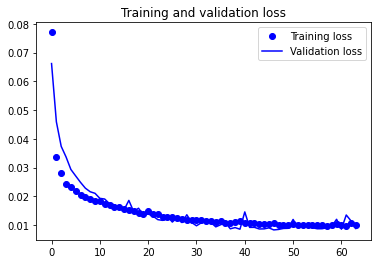

In [43]:
from matplotlib import pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Again, we drew a plot to examine the loss and val_loss values. 
According to the simple lstm network, the fluctuations in the validation loss curve have decreased. Thanks to this network, overfitting event is prevented.

We created a basic GRU network. Configures the model for training. Optimizer is the mechanism that the network will update itself according to the data it sees and the loss function. Loss function is how the network can measure how well it does a job in training data and thus steer itself in the right direction. Metrics to monitor during train and testing.

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import Dropout

regressor = Sequential()

regressor.add(GRU(units= 50, return_sequences = True, input_shape=(x_train.shape[1], 1)))

regressor.add(Dense(units = 1))

regressor.compile(optimizer='adam', loss='mean_squared_error') 

In [36]:
history= regressor.fit(x_train, y_train, epochs=64, batch_size=32, validation_split=0.3)

Epoch 1/64
28/28 [==============================] - 1s 20ms/step - loss: 0.0131 - val_loss: 0.0150
Epoch 2/64
28/28 [==============================] - 1s 20ms/step - loss: 0.0128 - val_loss: 0.0141
Epoch 3/64
28/28 [==============================] - 1s 20ms/step - loss: 0.0124 - val_loss: 0.0132
Epoch 4/64
28/28 [==============================] - 1s 20ms/step - loss: 0.0121 - val_loss: 0.0128
Epoch 5/64
28/28 [==============================] - 1s 20ms/step - loss: 0.0119 - val_loss: 0.0126
Epoch 6/64
28/28 [==============================] - 1s 20ms/step - loss: 0.0116 - val_loss: 0.0128
Epoch 7/64
28/28 [==============================] - 1s 20ms/step - loss: 0.0116 - val_loss: 0.0127
Epoch 8/64
28/28 [==============================] - 1s 20ms/step - loss: 0.0113 - val_loss: 0.0120
Epoch 9/64
28/28 [==============================] - 1s 20ms/step - loss: 0.0111 - val_loss: 0.0112
Epoch 10/64
28/28 [==============================] - 1s 20ms/step - loss: 0.0111 - val_loss: 0.0111
Epoch 11/

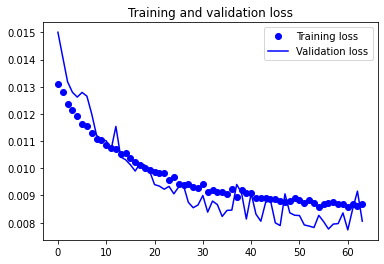

In [37]:
from matplotlib import pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Again, we drew a plot to examine the loss and val_loss values. 
It has more overfitting than the simple lstm network. Although the validation loss curve remained below the training loss curve after a certain point, the ups and downs continued.

We created the network to see the effect of dropout and recurrent dropout in the GRU network. Configures the model for training. Optimizer is the mechanism that the network will update itself according to the data it sees and the loss function. Loss function is how the network can measure how well it does a job in training data and thus steer itself in the right direction. Metrics to monitor during train and testing.

In [38]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import Dropout

regressor = Sequential()

regressor.add(GRU(units= 50,dropout=0.1,recurrent_dropout=0.5, return_sequences = True, input_shape=(x_train.shape[1], 1)))

regressor.add(GRU(units = 50,dropout=0.1,recurrent_dropout=0.5,return_sequences=True)) 

regressor.add(GRU(units = 50,dropout=0.1,recurrent_dropout=0.5,return_sequences=True)) 

regressor.add(GRU(units = 50,dropout=0.1,recurrent_dropout=0.5,return_sequences=True)) 

regressor.add(Dense(units = 1))

regressor.compile(optimizer='adam', loss='mean_squared_error') 

In [39]:
history= regressor.fit(x_train, y_train, epochs=64, batch_size=32, validation_split=0.3)

Epoch 1/64
28/28 [==============================] - 5s 190ms/step - loss: 0.0617 - val_loss: 0.0437
Epoch 2/64
28/28 [==============================] - 4s 148ms/step - loss: 0.0228 - val_loss: 0.0281
Epoch 3/64
28/28 [==============================] - 4s 144ms/step - loss: 0.0196 - val_loss: 0.0222
Epoch 4/64
28/28 [==============================] - 4s 161ms/step - loss: 0.0182 - val_loss: 0.0193
Epoch 5/64
28/28 [==============================] - 4s 150ms/step - loss: 0.0163 - val_loss: 0.0158
Epoch 6/64
28/28 [==============================] - 4s 150ms/step - loss: 0.0156 - val_loss: 0.0155
Epoch 7/64
28/28 [==============================] - 4s 151ms/step - loss: 0.0143 - val_loss: 0.0177
Epoch 8/64
28/28 [==============================] - 4s 149ms/step - loss: 0.0135 - val_loss: 0.0113
Epoch 9/64
28/28 [==============================] - 4s 150ms/step - loss: 0.0128 - val_loss: 0.0129
Epoch 10/64
28/28 [==============================] - 4s 152ms/step - loss: 0.0124 - val_loss: 0.0100

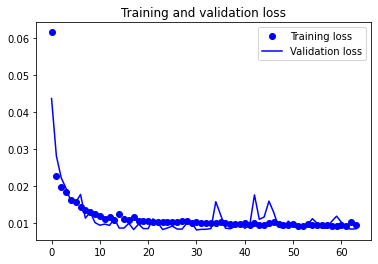

In [40]:
from matplotlib import pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Again, we drew a plot to examine the loss and val_loss values. 
Better training was provided by using dropout and recurrent dropout compared to simple gru network. According to simple gru network, overfitting event is blocked.